In [2]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
from targets.density_estimation_target import *
from utils.visual import *
from models import NDRE
import torch
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


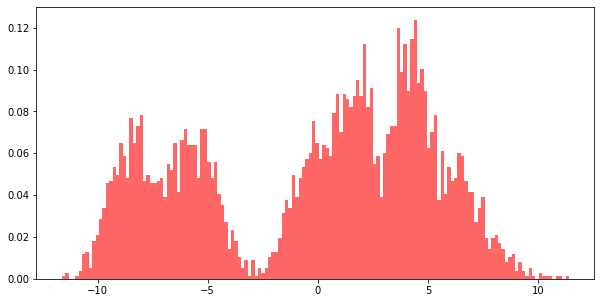

In [3]:
num_samples = 50000
target =Dimension1()
target.target_visual()
target_samples = target.sample(num_samples)

In [4]:
epochs = 50
batch_size = 5000
hidden_dims = [64,64,64]
ndre = NDRE(target_samples,hidden_dims)
ndre.train(epochs, batch_size)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:56<00:00,  1.14s/it, loss = 1.252881]


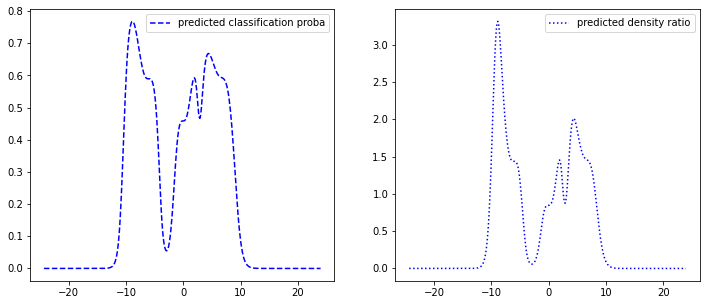

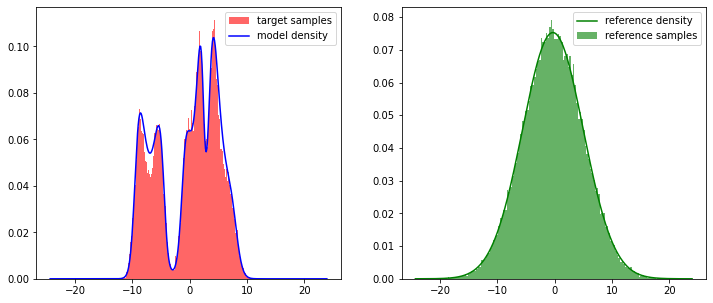

In [7]:
###Visualize classifier###
model_to_visualize = ndre
with torch.no_grad():
    reference_samples = ndre.reference.sample([num_samples])
    figure = plt.figure(figsize = (12,5))
    ax = plt.subplot(121)
    tt = torch.linspace(torch.min(reference_samples), torch.max(reference_samples), 400).unsqueeze(-1)
    prob = torch.sigmoid(model_to_visualize.logit_r(tt)) 
    ax.plot(tt, prob, label = 'predicted classification proba', color = blue_color, linestyle = '--')
    ax.legend()
    ax = plt.subplot(122)
    ratio = torch.exp(model_to_visualize.logit_r(tt))
    ax.plot(tt, ratio, label = 'predicted density ratio', color = blue_color, linestyle = 'dotted')
    ax.legend()
    plt.show()
    fig = plt.figure(figsize=(12, 5))
    ax = plt.subplot(121)
    ax.hist(model_to_visualize.target_samples.squeeze(-1).numpy(), density=True, bins=150, color=red_color, label='target samples',alpha=.6)
    ax.plot(tt, torch.exp(model_to_visualize.log_density(tt)).numpy(), color=blue_color, label='model density')
    ax.legend()
    ax = plt.subplot(122)
    ax.plot(tt, torch.exp(model_to_visualize.reference.log_prob(tt)).numpy(), color=green_color,label='reference density')
    ax.hist(model_to_visualize.reference.sample([model_to_visualize.target_samples.shape[0]]).squeeze(-1).numpy(), density=True, bins=150, color=green_color,label='reference samples', alpha=.6)
    ax.legend()
    plt.show()

estimating rejection sampling constant
number of accepted samples is 30899 out of 100000
recorded acceptance probablity = 0.30899
acceptance probability is 1/C = tensor(0.3013)


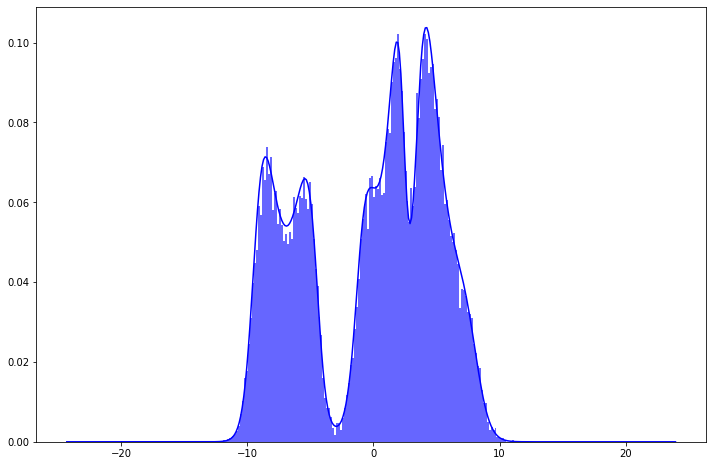

In [8]:
with torch.no_grad():
    num_samples = 100000
    fig = plt.figure(figsize=(12, 8))
    samples = ndre.sample(num_samples)
    print('number of accepted samples is ' + str(samples.shape[0]) + ' out of ' +str(num_samples))
    print('recorded acceptance probablity = ' +str(samples.shape[0]/num_samples))
    print('acceptance probability is 1/C = ' + str(1/torch.exp(model_to_visualize.log_constant)))
    plt.plot(tt, torch.exp(model_to_visualize.log_density(tt)).numpy(), color=blue_color, label='model density')    
    plt.hist(samples.numpy(), bins = 150, density =  True, color = blue_color, alpha = .6)
    plt.show()

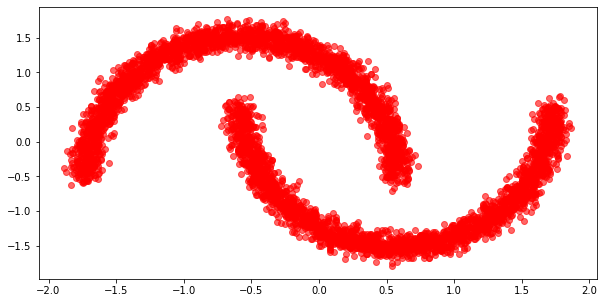

In [9]:
###2D Example###
num_samples = 50000
target =Moons()
target.target_visual()
target_samples = target.sample(num_samples)

In [10]:
epochs = 50
batch_size = 5000
hidden_dims = [64,64,64]
ndre = NDRE(target_samples,hidden_dims)
ndre.train(epochs, batch_size)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:46<00:00,  1.08it/s, loss = 0.62923]


c:\users\ea264728\pycharmprojects\neural-density-ratio\venv\lib\site-packages\torch\functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


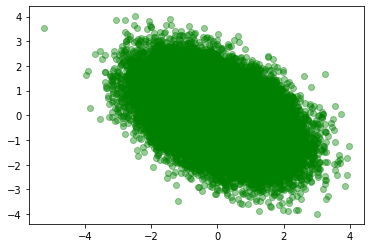

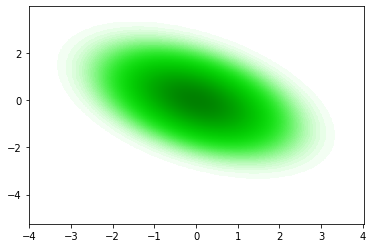

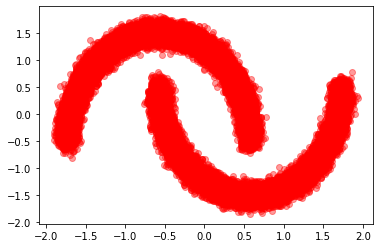

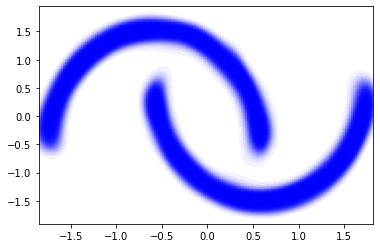

In [11]:
### Visualize NDRE dimension 2###

model_to_visualize = ndre
with torch.no_grad():
    plt.figure()
    proxy_samples = model_to_visualize.reference.sample([model_to_visualize.target_samples.shape[0]])
    plt.scatter(proxy_samples[:, 0], proxy_samples[:, 1], color=green_color, alpha = .4)
    plt.figure()
    tt_0 = torch.linspace(torch.min(proxy_samples[:, 0]), torch.max(proxy_samples[:, 0]), 500)
    tt_1 = torch.linspace(torch.min(proxy_samples[:, 1]), torch.max(proxy_samples[:, 1]), 500)
    grid = torch.cartesian_prod(tt_1, tt_0)
    density = torch.exp(model_to_visualize.reference.log_prob(grid)).reshape(500, 500).T
    plt.pcolormesh(tt_1, tt_0, density.numpy(), cmap=green_cmap)
    plt.figure()
    plt.scatter(model_to_visualize.target_samples[:, 0], model_to_visualize.target_samples[:, 1], color=red_color, alpha = .4)
    plt.figure()
    tt_0 = torch.linspace(torch.min(model_to_visualize.target_samples[:, 0]), torch.max(model_to_visualize.target_samples[:, 0]), 500)
    tt_1 = torch.linspace(torch.min(model_to_visualize.target_samples[:, 1]), torch.max(model_to_visualize.target_samples[:, 1]), 500)
    grid = torch.cartesian_prod(tt_1, tt_0)
    density = torch.exp(model_to_visualize.log_density(grid)).reshape(500, 500).T
    plt.pcolormesh(tt_1, tt_0, density.detach().numpy(), cmap=blue_cmap)

estimating rejection sampling constant
number of accepted samples is 45268 out of 1000000
recorded acceptance probablity = 0.045268
acceptance probability is 1/C = tensor(0.0437)


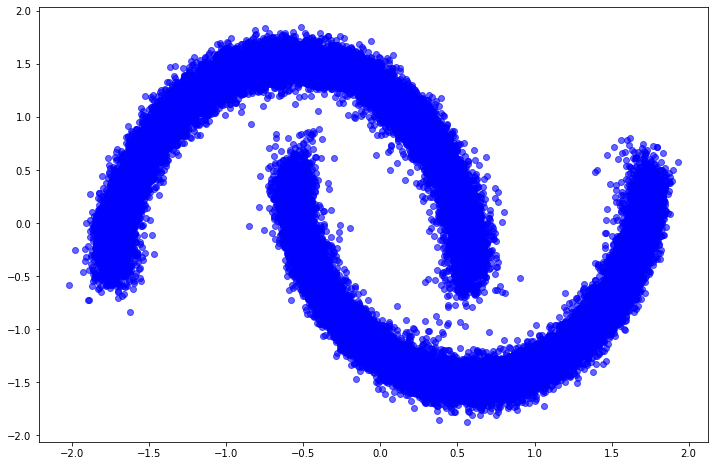

In [12]:
with torch.no_grad():
    num_samples = 1000000
    fig = plt.figure(figsize=(12, 8))
    samples = ndre.sample(num_samples)
    print('number of accepted samples is ' + str(samples.shape[0]) + ' out of ' +str(num_samples))
    print('recorded acceptance probablity = ' +str(samples.shape[0]/num_samples))
    print('acceptance probability is 1/C = ' + str(1/torch.exp(model_to_visualize.log_constant)))
    plt.scatter(samples[:,0].numpy(),samples[:,1].numpy(), color = blue_color, alpha = .6)
    plt.show()